In [2]:
import scipy.special as gms
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
def dPRHL(x, a, m, l):
    pdf= a*l*np.exp(-l*(x-m))/(1+np.exp(-l*(x-m)))**(a+1)
    return(pdf)

def cPRHL(x, a, m, l):
    cdf= (1+np.exp(-l*(x-m)))**(-a)
    return(cdf)

def qPRHL(q, a, m, l):
    quantile= m-np.log(q**(-1/a)-1)/l
    return(quantile)

In [4]:
a = 1.5

In [5]:
l = np.sqrt((gms.polygamma(1,a)+gms.polygamma(1,1))/1)
l

1.606155741948117

In [6]:
m = np.log(2**(1/a)-1)/l
m

-0.3312552173084385

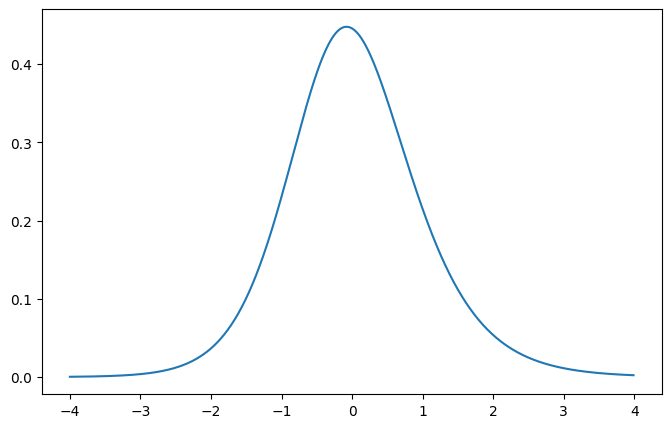

In [16]:
x = np.arange(-4,4,0.01)
x1 = np.arange(-4,0,0.01)
x2 = np.arange(0,4,0.01)


plt.figure(figsize=[8,5])

plot=sns.lineplot(x=x,
            y=dPRHL(x,a,m,l)
            )

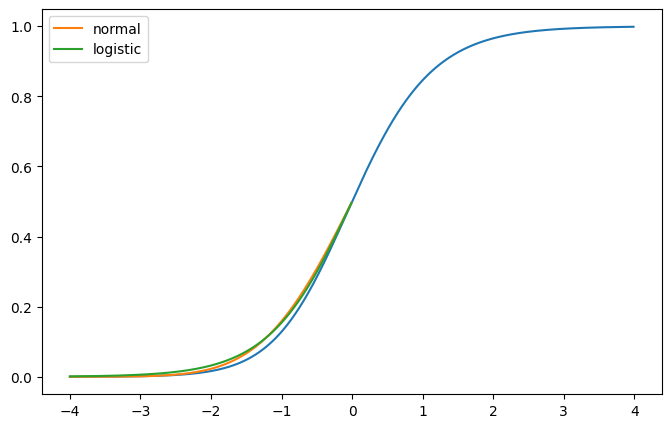

In [21]:


plt.figure(figsize=[8,5])

plot=sns.lineplot(x=x,
            y=cPRHL(x,a,m,l)
            )
plot=sns.lineplot(x=x1,
            y=norm.cdf(x1,0,1),
            label='normal'
            )

plot=sns.lineplot(x=x1,
            y=(1+np.exp(-1.702*x1))**-1,
            label='logistic'
            )

In [26]:
np.pi/np.sqrt(3)

1.8137993642342178

/var/folders/_b/90_50jmx367cjflchmhtcwyw0000gn/T/ipykernel_3568/2730341926.py:10: RuntimeWarning: divide by zero encountered in log
  quantile= m-np.log(q**(-1/a)-1)/l


<AxesSubplot: >

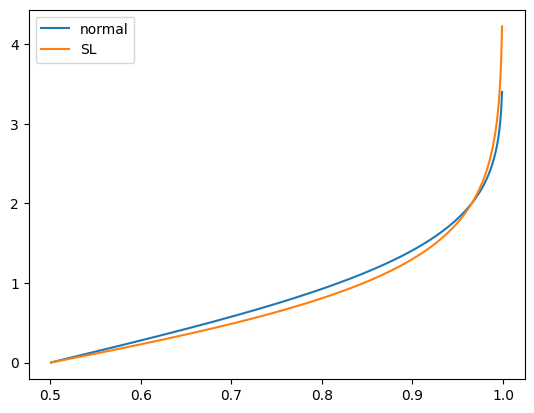

In [70]:
plot=sns.lineplot(x=1-np.arange(0,.5,0.001),
            y=norm.ppf(1-np.arange(0,.5,0.001),0,1.1),
            label='normal'
            )

sns.lineplot(x=1-np.arange(0,.5,0.001),
            y=qPRHL(1-np.arange(0,.5,0.001),a,m,l),
            label='SL'
            )

In [8]:
def a_to_sigma(s,a):
    xx = np.arange(0.001,.5,0.001)
    l = np.sqrt((gms.polygamma(1,a)+gms.polygamma(1,1))/1)
    m = np.log(2**(1/a)-1)/l
    r1 = sum((qPRHL(xx,a,m,l)-norm.ppf(xx,0,s[0]))**2)+sum((qPRHL(1-xx,a,m,l)-norm.ppf(1-xx,0,s[1]))**2)
    return(r1)

In [9]:
sum(np.arange(1,10))

45

In [10]:
a_to_sigma([0.9095,1.0707],1.52)

6.059481571774139

In [25]:
from scipy.optimize import minimize
res = minimize(a_to_sigma, x0=[1,1], method = 'Nelder-Mead',args=(1.3,))
res

 final_simplex: (array([[0.93644886, 1.04587347],
       [0.93637029, 1.04585248],
       [0.93635502, 1.04596978]]), array([5.89962049, 5.89962133, 5.89962259]))
           fun: 5.8996204873452065
       message: 'Optimization terminated successfully.'
          nfev: 47
           nit: 24
        status: 0
       success: True
             x: array([0.93644886, 1.04587347])

In [13]:
np.log(2**(1/np.array([1.5,1]))-1)/2

array([-0.26602373,  0.        ])